In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
clean_data = pd.read_csv('clean_data.csv')
y=clean_data['SalePrice']
clean_data=clean_data.drop(['SalePrice'],axis=1) #drop the y in clean_data
X = clean_data.iloc[:,1:] # drop the id column


In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [61]:
rg = Ridge()
rg.fit(X_train_sc,y_train)
y_test_pred = rg.predict(X_test_sc)
y_train_pred = rg.predict(X_train_sc)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse) #ridge's score is not so good

32846.437585314496

In [62]:
#use gridsearch on ridge
from sklearn.model_selection import GridSearchCV
parameters = { 'alpha':[0.1,1, 10,100,1000,10000]}
rg = Ridge(random_state=42)
clf = GridSearchCV(rg, parameters, cv=5)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

In [63]:
mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

30723.944334034182

In [64]:
clf.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

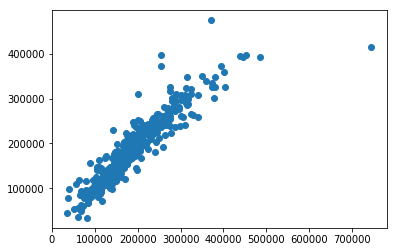

In [98]:
plt.scatter(y_test, y_test_pred)

In [74]:
#ensemble lasso and ridge
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
rg = Ridge(random_state=42,alpha=100)
ls = Lasso(random_state=42,alpha=1000)
regresers= [rg,ls]

for regreser in regresers:
    
    scores = cross_validate(regreser,X_train_sc,y_train,
                            scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    print(regreser)
    for k,v in scores.items():
        print(k+" : %0.2f +/- %0.2f" % (v.mean(), v.std()))

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)
fit_time : 0.02 +/- 0.00
score_time : 0.00 +/- 0.00
test_score : -1354644906.00 +/- 713770211.47
train_score : -219848276.68 +/- 6110185.84
Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
fit_time : 0.02 +/- 0.01
score_time : 0.00 +/- 0.00
test_score : -1269186256.26 +/- 894450161.36
train_score : -355650029.71 +/- 4793514.48


In [76]:
from sklearn.ensemble import BaggingRegressor
bagged_config = dict(n_estimators=20, max_samples=.6, max_features=.7, random_state=42)
bagging_rg = BaggingRegressor(Ridge(alpha=100), **bagged_config)
bagging_ls = BaggingRegressor(Lasso(alpha=1000), **bagged_config)

In [77]:
regresers= [bagging_rg,bagging_ls]

for regreser in regresers:
    
    scores = cross_validate(regreser,X_train_sc,y_train,
                            scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    print(regreser)
    for k,v in scores.items():
        print(k+" : %0.2f +/- %0.2f" % (v.mean(), v.std()))

BaggingRegressor(base_estimator=Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.6, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)
fit_time : 0.16 +/- 0.01
score_time : 0.00 +/- 0.00
test_score : -1332284719.05 +/- 700794400.09
train_score : -668039547.95 +/- 71215202.36
BaggingRegressor(base_estimator=Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.6, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)
fit_time : 0.29 +/- 0.04
score_time : 0.00 +/- 0.00
test_score : -1373306492.

In [97]:
from math import sqrt
test_score = -scores['test_score'].mean()
sqrt(test_score)

37058.150154907366